# Telco Report Project

## Goals of the project

### Part I
***Find the drivers of customers churn***
### Part II
***Build the machine learning model that can predict customer's churn with accuracy > 75%***

### Plan

#### Part I
1. Acquire the data from the ```telco``` database. Transform the data to a Pandas data frame to make it easy to use and manipulate in the Jupyter Notebook.
2. Prepare the data for exploration and analysis. Find out if there are some values missing and find a way to handle those missing values.
3. Explore the data through visualizations and statistical tests. Find which features are connected with the customers' churn and which ones are not. 
4. Make the exploration summary and leave the recommendation, where the company has to pay more attention


#### Part II
1. Pick the features that can help to build a good predicting model.
2. Pick the algorithms for creating the predicting model.
3. Split the data into 3 data sets: train, validate and test data (56%, 24%, and 20% respectively)
4. Create the models and evaluate them using the accuracy score on the train data sets.
5. Pick the models with the best accuracy score and evaluate them on the validation set.
6. Find out which model has the best performance: relatively high predicting power on the validation test and slight difference in the train and validation prediction results.
7. Apply the predictions to the test data set. Show the final accuracy scores. Save the predictions to the ```*.csv``` file

### Imports

In [1]:
# General DS imports
import pandas as pd
import numpy as np

#filter warnings
import warnings
warnings.filterwarnings("ignore")

#improve the quality of visualizations
%matplotlib inline
%config InlineBackend.figure_format='retina'

#import supporting modules

#to acquire and prepare data
import wrangle as wr

#to run stat tests, explore, visualize 
import explore as ex

#to build and evaluate models
import modeling as md

## Acquire

* Data is acquired from the ```telco``` database.
* To make it run on your computer you need to add your own ```env.py``` file into the repository. This file gives you access to the database.
* The initial data consists of 7043 rows and 24 columns
* Each observation represents a customer.
* Each column represents the information connected with the customer.

In [2]:
#acquire data.
#use wrangle.py module
df = wr.get_telco_data()

## Prepare Data

* Removed duplicates
* Removed the rows where total charges contained spaces instead of numbers.
* Converted the total charges to the number format.
* Removed the columns that contained unneeded columns like *services id's*.

Result:
* The post-cleaning data contains 7032 rows and 21 columns.
* In total 11 rows and 3 columns were removed

In [3]:
#prepare the data for the exploration and analysis
df = wr.prep_telco(df)

## Data Dictionary

*Description of every column in the data set with its unique values if available.*


| Feature | Definition |Values|
|:--------|:-----------|:-----------|
|<img width=150/>|<img width=550/>|
|**Categorical Data**
|*gender*| The gender of the customer  | 'Female', 'Male'
|*senior_citizen*| Gives the information if the customer is a senior citizen| 0 -not senior, 1 - is senior citizen
|*partner*| Shows if the customer has a partner| 'Yes', 'No'
|*dependents*| Information if the customer has dependents | 'Yes', 'No'
|**Phone services**
|*phone_service*| Phone service connected | 'Yes', 'No'
|*multiple_lines*| Multiple phone lines connected | 'Yes', 'No', 'No phone service'
|**Internet services**
|*internet_service_type*|  Type of internet service customer has | 'DSL', 'Fiber optic', 'None'
|*online_security*| Online security included | 'Yes', 'No', 'No internet service'
|*online_backup*| Online backup included | 'Yes', 'No', 'No internet service'
|*device_protection*| Device protection included | 'Yes', 'No', 'No internet service'
|*tech_support*|  Tech support included | 'Yes', 'No', 'No internet service'
|*streaming_tv*|  Streaming TV included| 'Yes', 'No', 'No internet service'
|*streaming_movies*|  Streaming movies | 'Yes', 'No', 'No internet service'
|**Financial categories**
|*paperless_billing*|  Does customer use paperless billing | 'Yes', 'No'
|*contract_type*|  What type of contract has the customer | 'One year', <br>'Month-to-month', <br>'Two year'
|*payment_type*|  How does the customer pay for the service | 'Mailed check', <br>'Electronic check', <br>'Credit card (automatic)', <br>'Bank transfer (automatic)'
|
|
|**Numerical Data**
|*monthly_charges*|  Monthly payment of the customer | Amount in USD
|*total_charges*|  Total amount paid to the company during all the period | Amount in USD
|*tenure*| How long did the customer stay with the company | Number of months
|
|**Other Data**
|*customer_id*| Unique customer's id number| 7032 unique id's of customers
|
|**Target Data**
|
|**churn** | **Did the customer churn?** | **'Yes', 'No'**

## Explore

In the exploration part of my project, I will go through some of the features mentioned above and I'll try to figure out if these features are associated with the customers' churn in the company.

I need to create some additional variables for the exploration and analysis. ```categorical_data``` will hold names of all categorical data except ```customer_id```. I create 2 subsets: ```churned``` holds the information about all customers that already left the company, ```not_churned``` contains the data about current customers.

In [4]:
#create a list that holds the categorical data column names
categorical_data = wr.get_cat_variables(df)

In [5]:
#a subset with all customers that churned
churned = df[df.churn == 'Yes']

In [6]:
#a subset with all current customers
not_churned = df[df.churn == 'No']

### 1. Is there any association between having a phone or internet service and customers churn? 

*phone_service and internet_service_type_ features analysis*

Let's visualize our questions and hopefully, we'll see some answers.

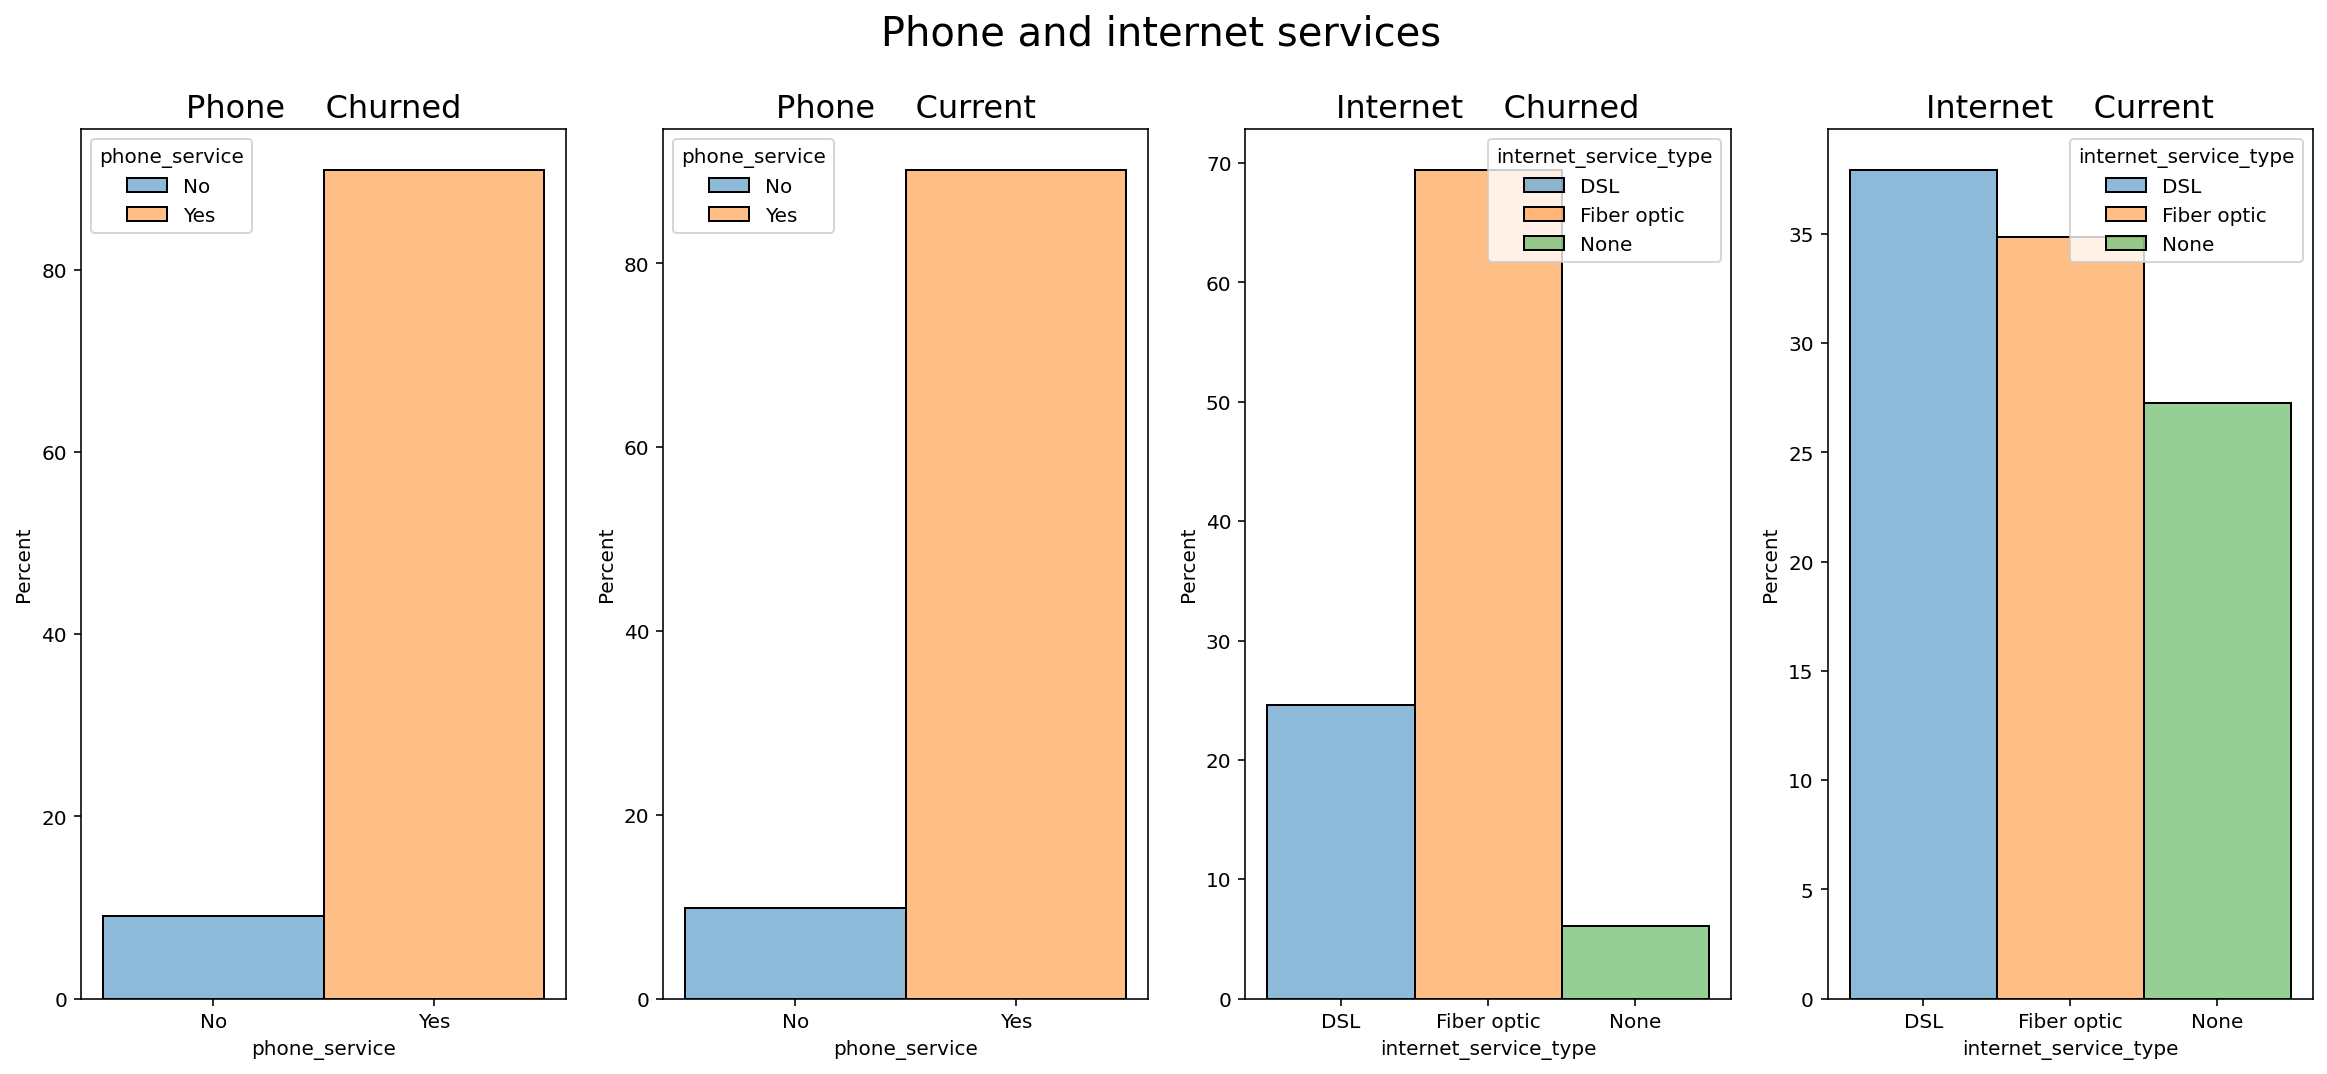

In [7]:
#the function returns a visualization of proportions of churn among customers 
#that have/don't have the internet and phone services
ex.visualize_phone_internet_services(churned, not_churned)

Phone service seems to be **not related** to the customer's churn at all, while internet services have very different distributions between churned and current customers. Specially it's very noticeable that having a fiber optic service leads to a high probability of churn.

Let's confirm our statements by running **statistical tests**. I use Chi-squared test for the categorical variables

Assumptions to be met:
1. Samples are random
2. Samples are large
3. Samples are independent

Here and after:

- $H_0:$ stands for 'Null hypothesis’ 
- $H_a:$ stands for 'Alternative hypotheses'

- All statistical tests run for the **95% Confidence level**.
- The **significance level** (alpha) is set to **0.05**
- If the p-value is smaller than 0.05 we reject the Null hypothesis.

*Test #1*

$H_0:$ There is no association between having phone service and customers' churn.

$H_a:$ There is an association between having phone service and customers' churn.

In [8]:
#the function runs chi-squared test and prints out its result
#compares churn between customers that have a phone service connected and those that don't
ex.phone_service_test(df)

P-value is 0.34992398942431924
There is not enough evidence that having a phone service connected is associated with customer churn


*Test #2*

$H_0:$ There is no association between internet service type and customers’ churn.

$H_a:$ There is an association between internet service type and customers’ churn.

In [9]:
#the function runs chi-squared test and prints out its result
#compares churn between customers that have different internet service types
ex.internet_service_test(df)

P-value is 5.831198962237274e-159
There is enough evidence that Internet service type is associated with customers churn


In the first test, our p_value is quite high. It means that we fail to reject our $H_0$ null hypothesis. *Phone service indeed has no association with a customer's churn*. 

We obtained directly opposite results with the second statistical test. P-value is so low that it has 158 zeros before it reaches the first non-zero digit. It means that the probability of churn varies a lot among customers with different internet service types. Or, speaking the scientifical language, we reject our $H_0$ null hypothesis. *There is an association between internet service type and customer churn.*

## 2. When do customers churn more?
*tenure feature analysis*

As always let's start with the visualizations. I’ve created a distribution that shows how many months customers have spent with the company. Please, pay close attention to the distribution of the ```churned``` subset, as it is very different from the distribution of the current customers.

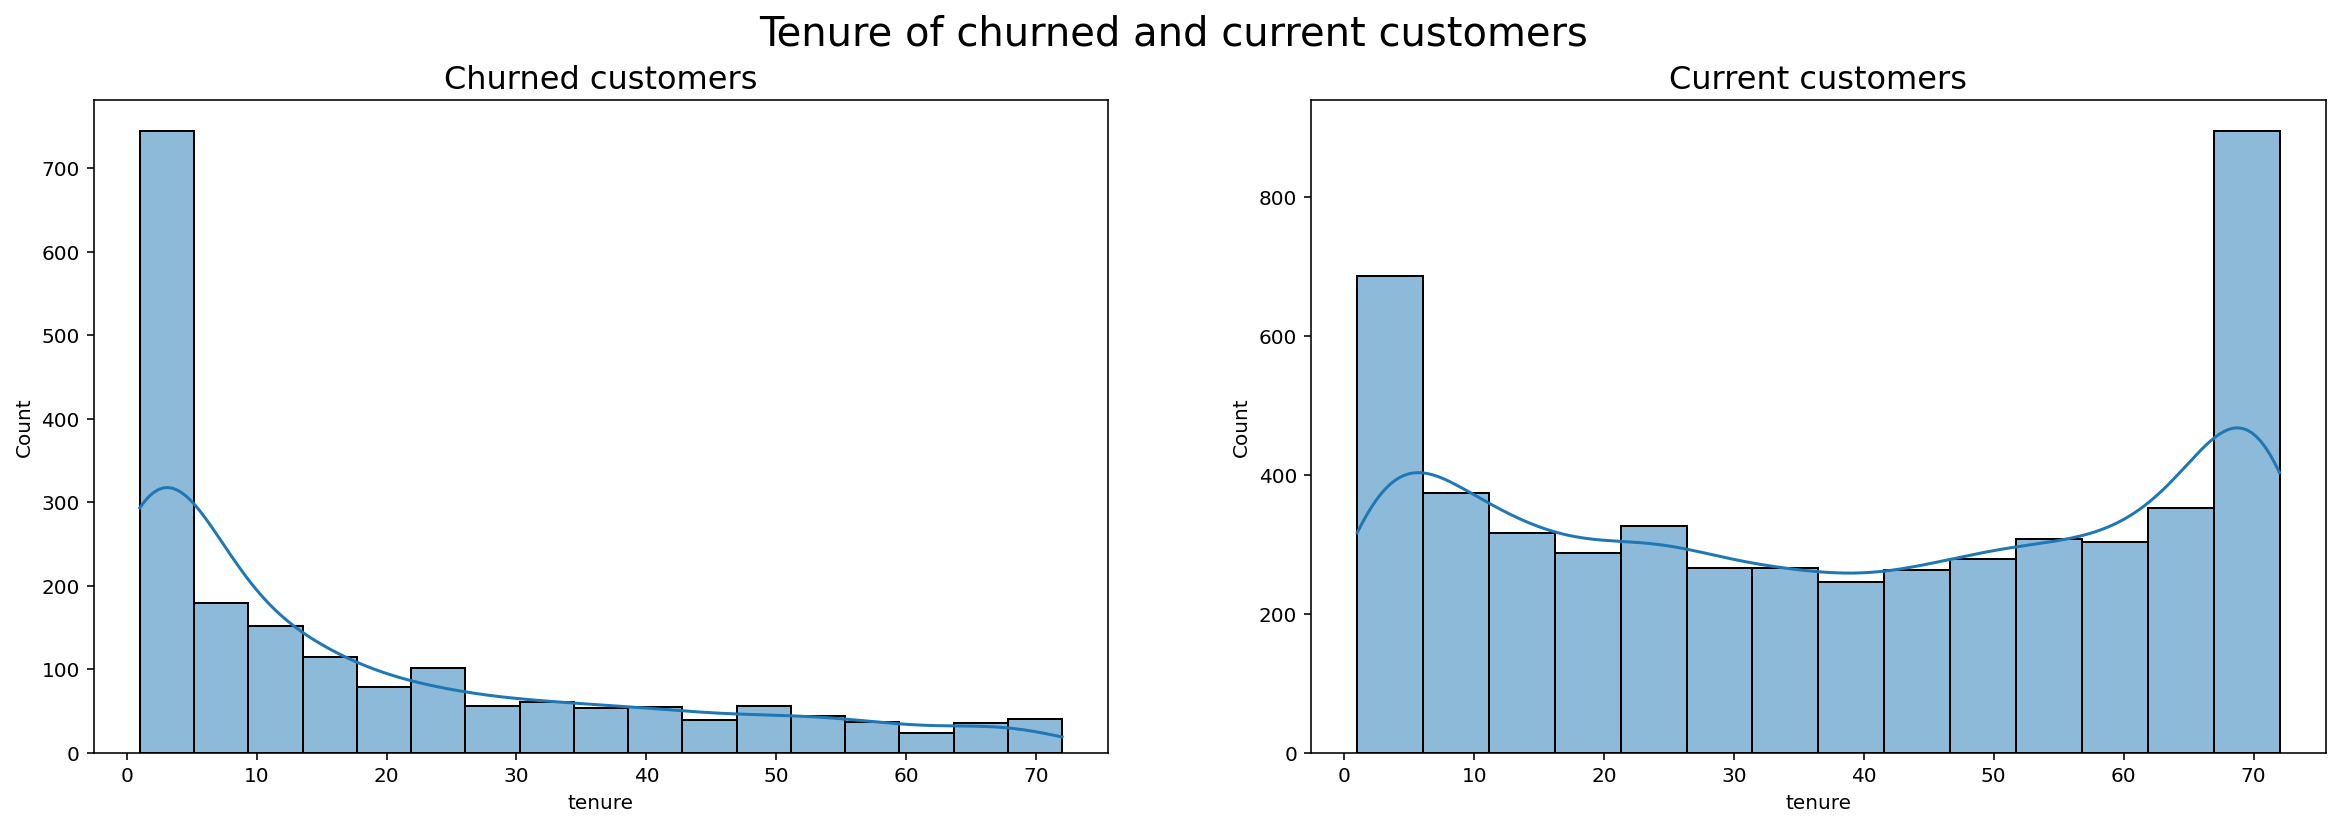

In [10]:
#the function returns a visualisation of the tenure
#on x-axis shows the number of months, y-axis show a number of cusomers
ex.visualize_tenure(churned, not_churned)

We can see that most of the customers churned during the first 2 years. To be more specific, most customers churn approx. during their first  5-6 months with the company, then the churn number slowly decreases and after 24 months stays at more or less the same low level.

## 3. Do the customers with month-to-month contracts churn more than those with one year or two-year contracts?
*contract_type feature anlysis*

Question visualization:

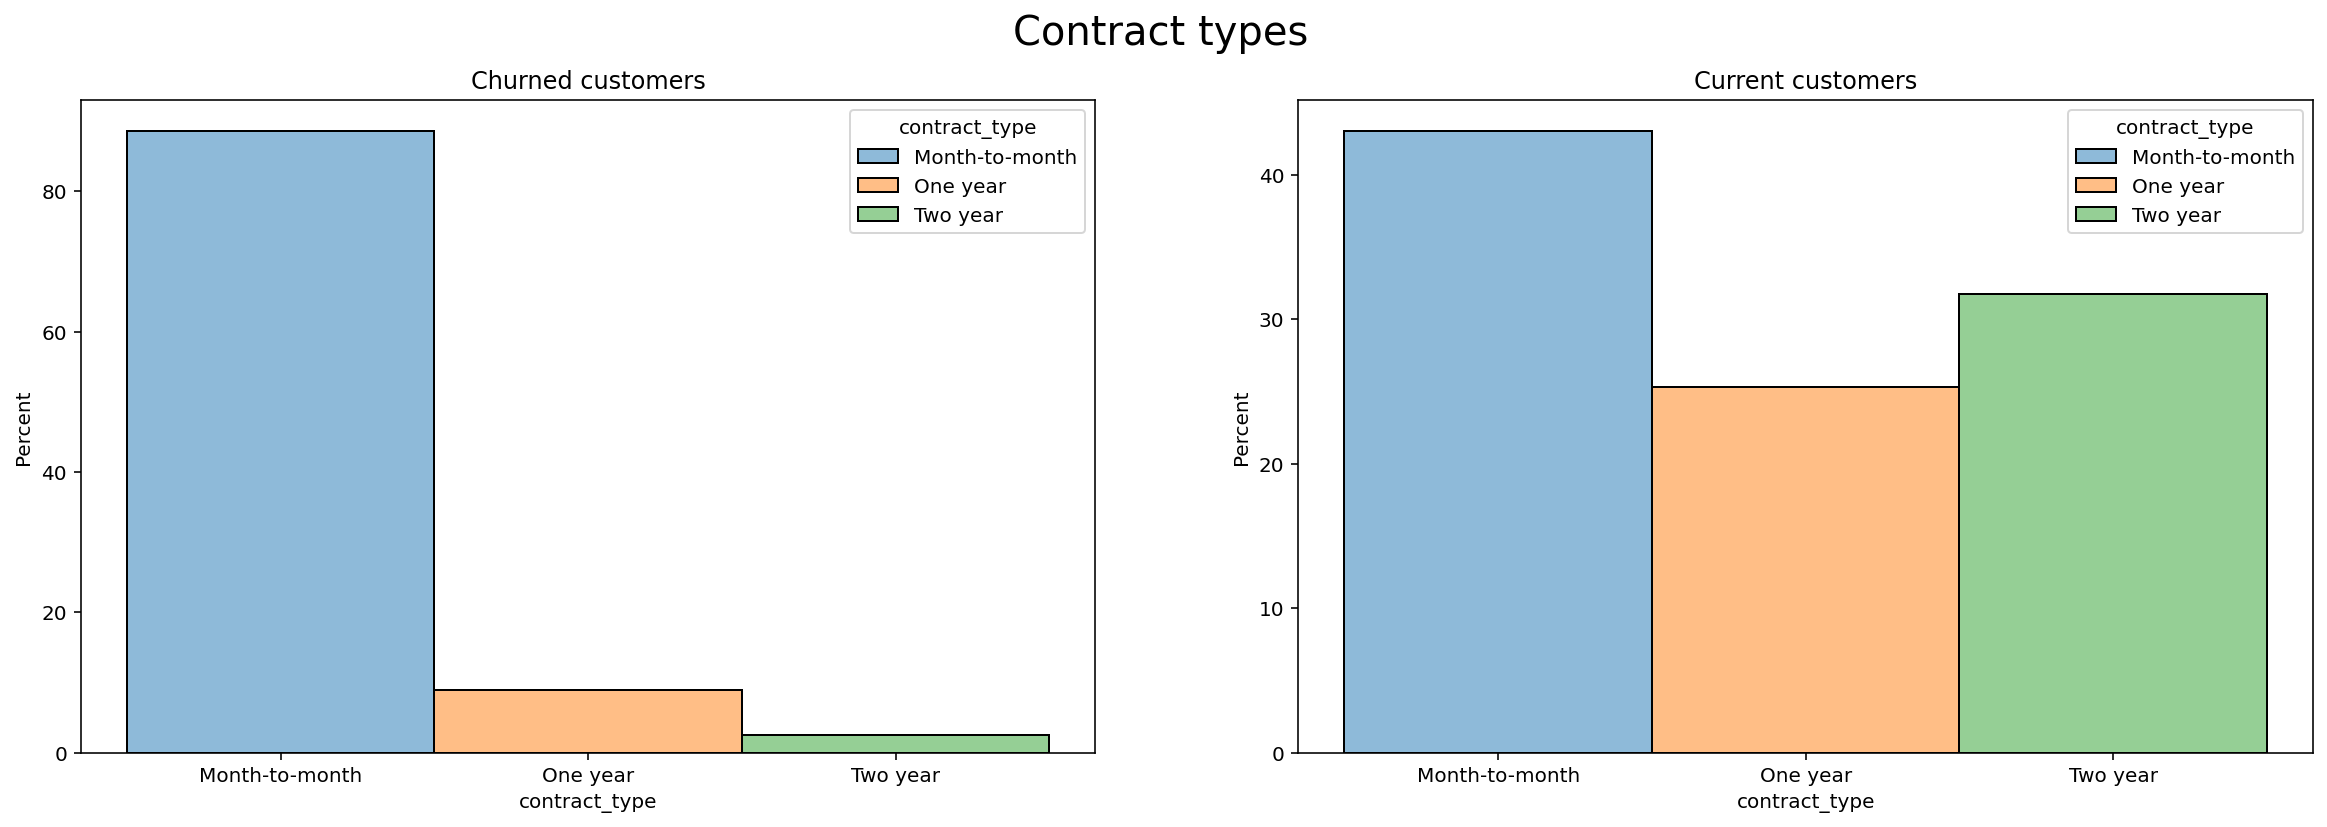

In [11]:
#the function visualizes the contract types that have /had currernt and churned customers
ex.visualize_contract_type(churned, not_churned)

Even without running a statistical test, we can see a strong disproportion in churning among customers with month-to-month contracts vs other types of contracts. We can assume that contract type is one of the strongest features that predict the chances of the customers churn. Customers with month-to-month contracts tend to churn significantly more than customers with one-year or two-year contracts.

## 4. Does having high monthly charges leads to churn?
*monthly_charges analysis*

Let’s see if there are any conclusions that we can take straight away from the visualization of monthly charges.

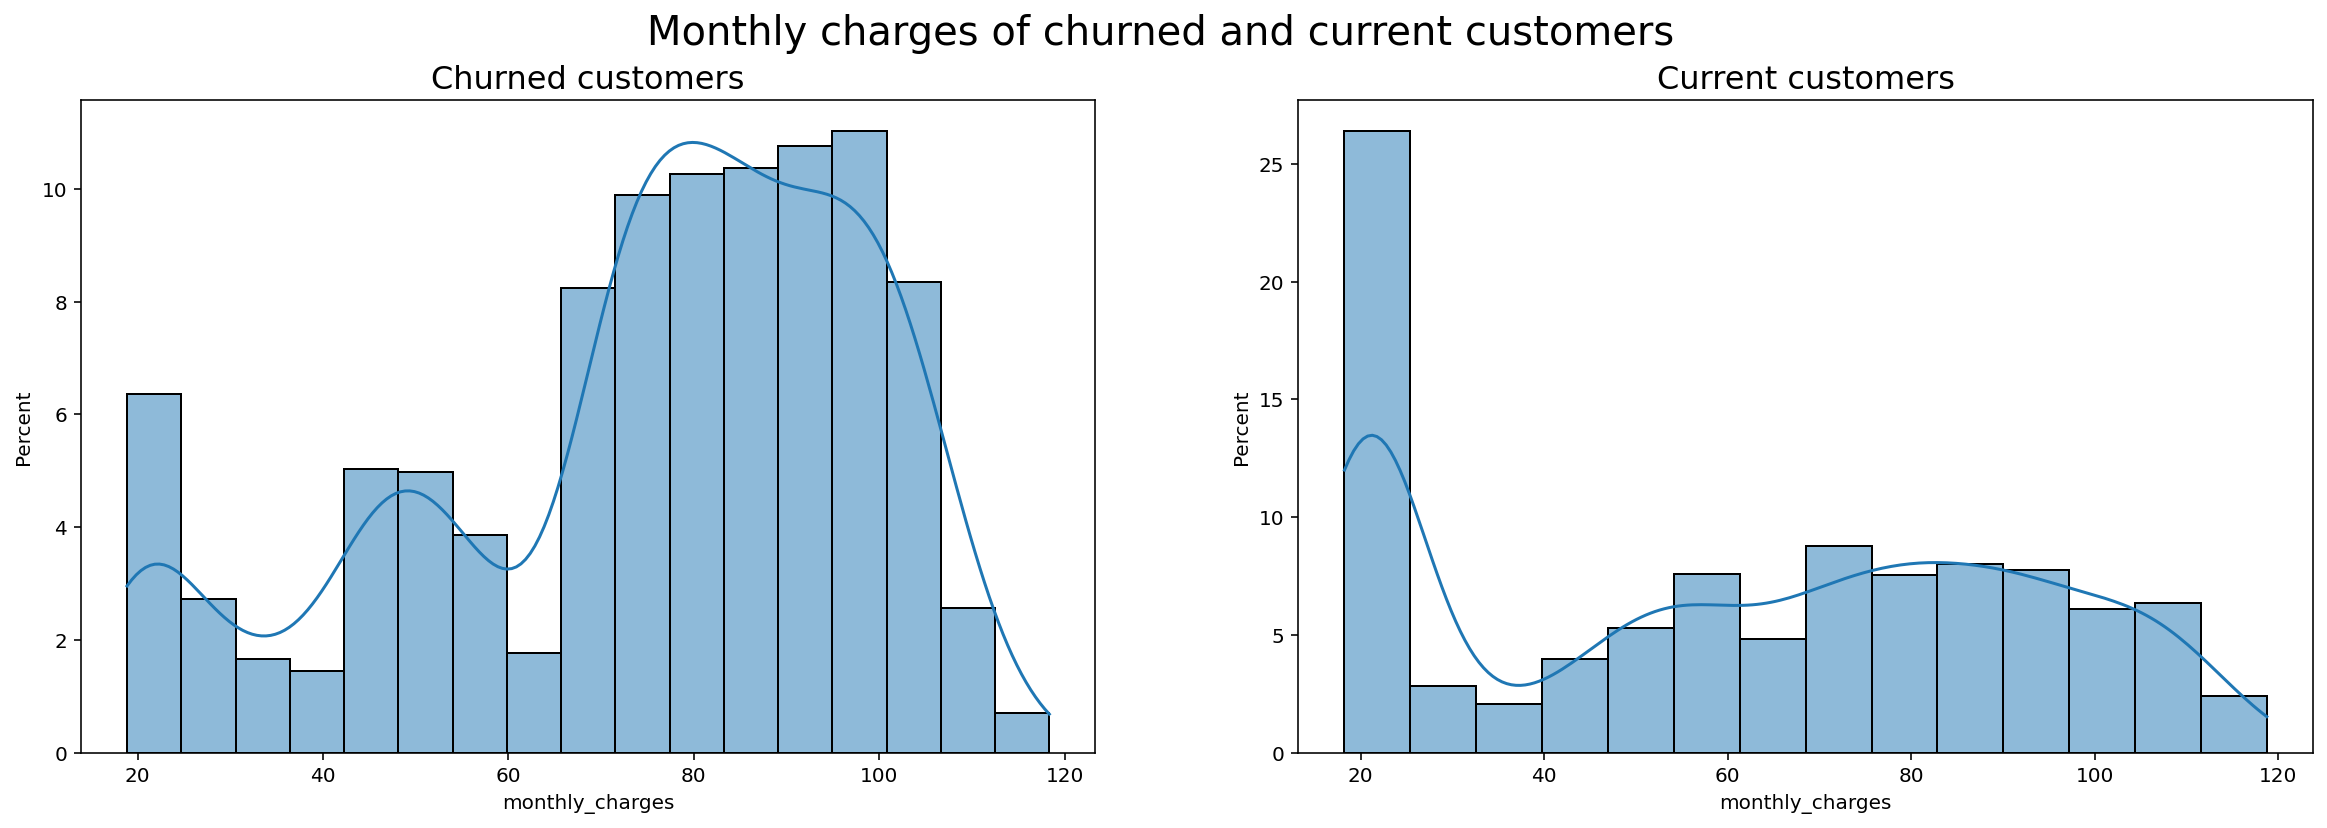

In [12]:
#the function visualizes the monthly charges of churned and current customers
ex.visualize_monthly_charges(churned, not_churned)

We can see that most of the churned customers had higher-than-average monthly charges. To confirm the visualization results I will run a **two-sampled T-test**, that compares the average results of samples.

To run the test I need to verify assumptions.
1. Large samples - pass
2. Normal distributions - fail. 
- We can see that both distributions are far from being normal. In this case, the sample size is big enough and we can apply the Central Limit Theorem to assume the normality of the distribution.
3. Equal variances - needs an additional check.

In [13]:
#functions runs the Levene test to check if the variances are equal
ex.check_variances(churned, not_churned, 'monthly_charges')

Variances are not equal


Variances are not equal, but the T-test has a solution for this assumption, we can simply pass a parameter ```eqaul_var=False```

**Statistical test**

$H_0:$ The average monthly charges of churned customers <= The average monthly charges of customers who haven't churned

$H_a:$ The average monthly charges of churned customers > The average monthly charges of customers who haven't churned

In [14]:
#function runs the 2 sampled T-test and prints out the result
ex.test_monthly_charges(churned, not_churned)

P-value is 2.6573571445161785e-72
The average monthly charges of churned customers <= The average monthly charges of customers who haven't churned


The result of the test confirms what we observed in the graphical representation before. Churned customers had on average significantly higher monthly charges.

## 5. Are the monthly charges correlated with the number of additional services?
My guess is that monthly_charges are correlated with the number of additional servises. I'd like to confirm it through the visualization.

In [15]:
#the function changes 'No ... service' & 'No' values to 0, 'Yes' to 1 and calculates the sum of services
wr.add_services_number(df)

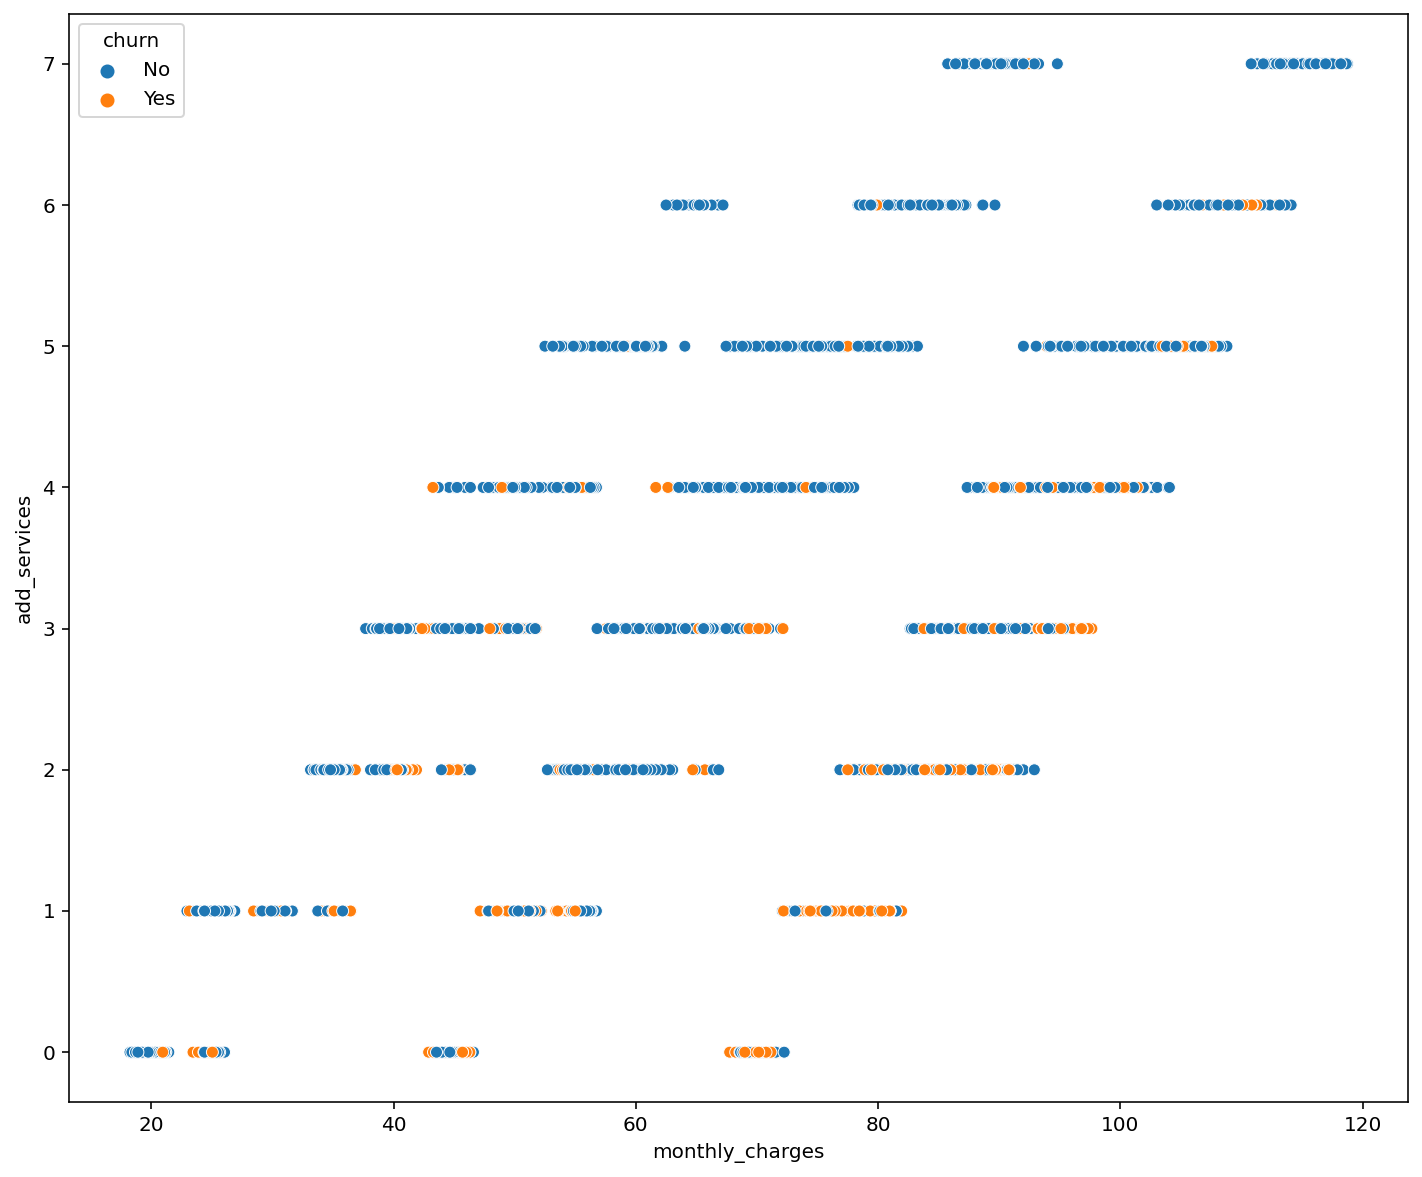

In [16]:
#show the scatter plot. x-axis -> monthly charges in USD, y-axis -> number of additional services
ex.charges_services_corr(df)

Obviously, there is a correlation between adding additional services and monthly charges. We can state it even without a graphical representation. What is interesting here, those who pay most and have maximum of additional services included are loyal to the company and don't churn. You can see them at the top right corner of the graph.

The orange color, which represents churned customers, appears more in the section that shows customers having charges > $60 per month and less than 2 additional services included. They pay more than average and get less than average. My initial guess here is, those customers use Fiber optics internet. We have already seen that they churn much more than those who use other type(s) of internet.

## Exploration takeaways and recommendations

1. Having or not having a phone service doesn't affect the customer’s churn much.
3. Fiber optic customers churn more.
    - ***Recommendation:*** research the competitor's market and reconsider the payment for the fiber optic internet or include more additional services for free for those customers.
4. Most of the churn happens within the first few months. My guess is that those customers are travelers that use the phone/internet services only for a short period of time.
    - ***Recommendation:***
        * Create special attractive 'travelers packages’ and track them as well. This will help to identify if the churn is linked to travel reasons or if the company has something that makes new customers unhappy.
        * Offer some additional service discounts at the end of the first half-year period.
5. Most customers that churn have month-to-month contracts.
    - ***Recommendation:*** give more incentives for signing one-year or two-year contracts
6. Churned customers also had higher monthly payments. Monthly payments correlate with additional services. We can not recommend cutting the services, but we can recommend making more attractive service packages.
    - ***Recommendation:*** create more attractive service packages with better quality/price relationship

At the very end of the first part of my project, I'd like to run a quick statistical chi-squared test for all categorical variables in our data set. It will help with the modeling in the next part of the project. The table below shows all categorical variables, their p-value, and True / False values if the p-value shows significance. All variables are sorted from the most significant to the less significant.

In [17]:
#returns a data frame with p-values for each catgorical varibale and if it is associated with churn.
ex.get_p_values(df, categorical_data).sort_values(by='P_value')

,Feature,P_value,is_significant
13,churn,0.000000e+00,True
14,contract_type,7.326182e-257,True
15,internet_service_type,5.831199e-159,True
16,payment_type,1.426310e-139,True
12,paperless_billing,8.236203e-58,True
6,online_security,1.374240e-46,True
9,tech_support,3.232868e-43,True
3,dependents,2.019659e-42,True
0,senior_citizen,2.479256e-36,True
2,partner,3.973798e-36,True


## Part II - Modeling

### The goal of the modeling:
**Create a strong machine learning model that can predict customer churn with an accuracy of > 75%**
A strong model has a relatively good accuracy in all train / validate and test data sets. The accuracy score should not vary much in those data sets.

* I use the accuracy score for the model's evaluation.
* The accuracy score calculates how many correct predictions were made by the model.
* The second measure of evaluation is a baseline score: How many correct predictions I'm going to make if I just fill all predictions with the most popular value? The model's accuracy should at least beat the baseline's accuracy (approx. 73.4%)

To prepare the data set for modeling it has to be:

- digitized: all categorical data has to be represented with numbers (0's and 1's in most cases)
- split in a train, validate and test data sets, and train, validate and test target values. 

I need ```customer_id```  numbers for the final ```*.csv``` file with predictions. Because of this, the ```customer_id``` column will be removed after the splitting.

Our target variable is customer ```churn```. The model should use other features to predict it.

**Features that I won't use to the create models**

|Feature|The reason|
|:------|:-------|
|<img width=150/>|<img width=450/>|
|*phone_service*|Not significant
|*gender*|Not significant
|*total_charges*| ```total_charges``` $\approx$ ```monthly_charges``` * ```tenure```
|*streaming_movies*| remove 'noise' (3 less significant features)
|*streaming_tv*|remove 'noise' (3 less significant features)
|*multiple_lines*|remove 'noise' (3 less significant features)

**Features that I will use to create the models**

All other features will go into the train, validate and test data sets. On top of this, I've created a column that holds the number of additional services per customer.

**How I create models**

I use 4 different classifiers (classification algorithms): 
- Decision Tree, 
- Random Forest, 
- KNN and,
- Logistic Regression. 

For the first 3 of them, I use different hyperparameters. And with all of them, I use different combinations of features. Those combinations are saved in the python dictionary. 

Every classifier runs in a function where it creates models in a ```for``` loop. This loop iterates through the features and in some cases through the hyperparameters as well. After the iterations, the function returns a ```DataFrame``` that contains only 2 models from each classifier. Those are the models that obtained the best accuracy on the train set. 

The next function calculates the difference between the train and validate scores and returns the 3 best models (sorted by maximum ```validate_score``` and minimum ```score_difference```)

I pick the very best model by visual observation of those 3 models and then I make the final predictions on the test set and save the results into a ```*.csv``` file.

In [18]:
#digitize the categorical values, "create dummies"
df = wr.dummies_telco(df)

In [19]:
#split the data set in 3 subsets and 3 series with our target variable
X_train, X_validate, X_test, y_train, y_validate, y_test = wr.full_split(df, 'churn')

In [20]:
#confirm the baseline score
md.get_baseline_scocre(y_train)

0.7343154686309372

In [21]:
#get customer ids series and drop this column from 3 subsets
customer_ids = md.get_customers_ids(X_train, X_validate, X_test)

In [22]:
#run models and save the results in a dataframe
results = md.get_best_train_models(X_train, X_validate, y_train, y_validate)
results

,model_name,feature_name,features,parameters,accuracy_score,validate_score
35,Decision Tree,f12,"[tenure, add_services, paperless_billing, mont...",3,0.792,0.784
20,Decision Tree,f7,"[contract_type, online_security, tech_support,...",3,0.792,0.784
44,Random Forest,f9,"[tenure, contract_type, paperless_billing, mon...",5,0.805,0.779
43,Random Forest,f9,"[tenure, contract_type, paperless_billing, mon...",4,0.804,0.777
220,KNN,f12,"[tenure, add_services, paperless_billing, mont...",1,0.995,0.720
140,KNN,f8,"[tenure, contract_type, monthly_charges, senio...",1,0.988,0.729
11,Logistic Regression,f12,"[tenure, add_services, paperless_billing, mont...",0,0.795,0.791
15,Logistic Regression,f16,"[tenure, online_security, device_protection, t...",0,0.795,0.796


In [23]:
#save 3 best models to results data frame
results = md.count_differnce(results)
results

,model_name,feature_name,features,parameters,accuracy_score,validate_score,score_difference
15,Logistic Regression,f16,"[tenure, online_security, device_protection, t...",0,0.795,0.796,0.001
11,Logistic Regression,f12,"[tenure, add_services, paperless_billing, mont...",0,0.795,0.791,0.004
35,Decision Tree,f12,"[tenure, add_services, paperless_billing, mont...",3,0.792,0.784,0.008


And the prediction winner is a **Logistic Regression** with features:
- tenure
- online_security
- device_protection
- tech_support
- paperless_billing
- monthly_charges
- contract_type
- internet_service_type
- payment_type

In [24]:
# run the final test, save the results to a new data frame with 1 row that describes the best model
# the final test function also returns 2 lists: 
# probabilities of churn (float value between 0 and 1)
# predictions (0-didn't churn, 1 churned)
best_model, probabilities, predictions = md.run_the_final_test(results, X_train, X_test, y_train, y_test)

In [25]:
best_model

,model_name,feature_name,features,parameters,accuracy_score,validate_score,score_difference,test_score
15,Logistic Regression,f16,"[tenure, online_security, device_protection, t...",0,0.795,0.796,0.001,0.814


In [26]:
# save customer ids, probabilities and predictions of churn to the predictions.csv file
md.save_to_csv(customer_ids, probabilities, predictions)

### Modeling Summary

- With these amount of different features, it is not easy to pick those that would return amazing score results.
- Logistic Regression performs much better in terms of showing similar results with ```train```, ```validate``` and ```test``` data sets. It won the first two positions in my 'best model' criterion.
- The 3rd best model was Desicion Tree with ```max_depth``` hyperparameter set to ```3```.
- Overall, my goal was to create a model that has a prediction power > 75%, and my 'winner' successfully coped with the task

## Conclusions and the next steps

 -Most of the data presented in the ```telco``` data set affects the customer's churn. The analysis provided in this project is just a first step on the way to deeper explorations and predictions. The next step in the exploration would be a multivariate analysis. Do the customers with dependents prefer Streaming Tv or Device protection? Do their preferences make them stay with the company or leave? Who are the people that sign Two-year contracts? Senior citizens, married couples?  What services do they prefer to include? What contracts do fiber optic customers sign? 
- The multivariate analysis will help to see the churn drivers better and possibly will help to build a better prediction model.